In [ ]:
!pip3 install tensorflow

In [ ]:
!pip3 install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten,Dense
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import lite

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yessypermatasari","key":"e157428c4f31b0686745d8190a4f1c85"}'}

In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download xhlulu/140k-real-and-fake-faces

100% 3.74G/3.75G [00:47<00:00, 41.4MB/s]
100% 3.75G/3.75G [00:47<00:00, 85.1MB/s]


In [ ]:
!unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
img_width, img_height = 256, 256

train_data_dir = 'real_vs_fake/real-vs-fake/train/'
validation_data_dir = 'real_vs_fake/real-vs-fake/test/'


nb_train_samples = 1000
nb_validation_samples = 1000
#epochs = 50
#batch_size = 16
epochs = 10
batch_size = 10

In [ ]:
model = Sequential()
model.add(Conv2D(28, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(28, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(56, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(56, activation='relu'))
model.add(Dense(112))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(256, 256))     

validation_generator =  test_datagen.flow_from_directory(validation_data_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (256, 256))

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=1000,
                    epochs=10,
                    validation_steps=1000,
                    verbose=2)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Epoch 1/10
1000/1000 - 91s - loss: 0.6261 - accuracy: 0.6386 - val_loss: 0.5389 - val_accuracy: 0.7303
Epoch 2/10
1000/1000 - 91s - loss: 0.4863 - accuracy: 0.7699 - val_loss: 0.4573 - val_accuracy: 0.7868
Epoch 3/10
1000/1000 - 89s - loss: 0.4145 - accuracy: 0.8119 - val_loss: 0.3990 - val_accuracy: 0.8188
Epoch 4/10
1000/1000 - 88s - loss: 0.3591 - accuracy: 0.8442 - val_loss: 0.3731 - val_accuracy: 0.8330
Epoch 5/10
1000/1000 - 87s - loss: 0.3057 - accuracy: 0.8709 - val_loss: 0.3364 - val_accuracy: 0.8582
Epoch 6/10
1000/1000 - 88s - loss: 0.2606 - accuracy: 0.8958 - val_loss: 0.3027 - val_accuracy: 0.8715
Epoch 7/10
1000/1000 - 90s - loss: 0.2290 - accuracy: 0.9096 - val_loss: 0.3129 - val_accuracy: 0.8717
Epoch 8/10
1000/1000 - 90s - loss: 0.2053 - accuracy: 0.9198 - val_loss: 0.2647 - val_accuracy: 0.8960
Epoch 9/10
1000/1000 - 89s - loss: 0.1748 - accuracy: 0.9323 - val_loss: 0.2800 - val_acc

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 28)      784       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 28)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 28)      7084      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 28)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 56)        14168     
_________________________________________________________________
flatten_3 (Flatten)          (None, 201600)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 56)               

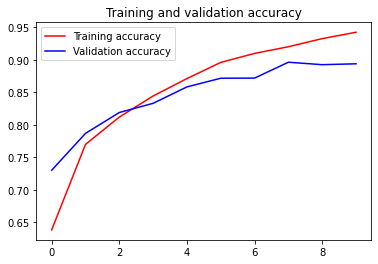

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (256,256))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0] != 0:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

Enter Location of Image to predict: real_vs_fake/real-vs-fake/train/real/00011.jpg
Prediction:  Real


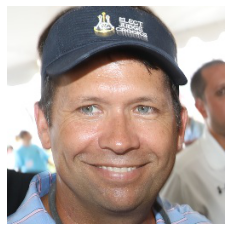

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

Enter Location of Image to predict: real_vs_fake/real-vs-fake/test/fake/1L4UQE15JB.jpg
Prediction:  Fake


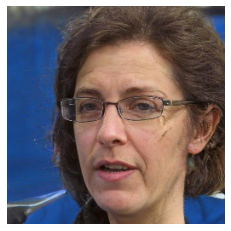

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)

Enter Location of Image to predict: real_vs_fake/real-vs-fake/test/fake/1K03OCDDCY.jpg
Prediction:  Fake


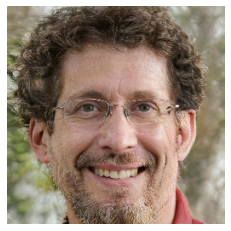

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

Enter Location of Image to predict: real_vs_fake/real-vs-fake/test/fake/1KDV78H2GM.jpg
Prediction:  Fake


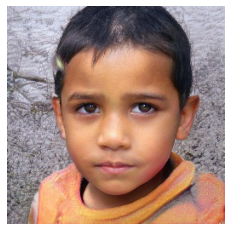

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_4 = ImagePrediction(img)

In [ ]:
model.save('sample_data/model_training.h5')